In [2]:
# pip install easyocr
!pip install torch torchvision torchaudio

ERROR: torchaudio 0.9.0 has requirement torch==1.9.0, but you'll have torch 1.8.1 which is incompatible.


In [3]:
import easyocr
import cv2
from matplotlib import pyplot as plt
import numpy as np

# 1. read the images and video

In [14]:
image_path = 'itt.png'

In [15]:
reader = easyocr.Reader(['en'], gpu=False )
result = reader.readtext(image_path)
result

Using CPU. Note: This module is much faster with a GPU.


[([[80, 5], [498, 5], [498, 53], [80, 53]],
  'This is the first line of',
  0.9706248580333515),
 ([[6, 62], [352, 62], [352, 116], [6, 116]],
  'this text example:',
  0.7271138999425192),
 ([[81, 117], [507, 117], [507, 161], [81, 161]],
  'This is the second line',
  0.8232139260297935),
 ([[9, 173], [335, 173], [335, 217], [9, 217]],
  'of the same text.',
  0.8840976412343927)]

# handling multiple line

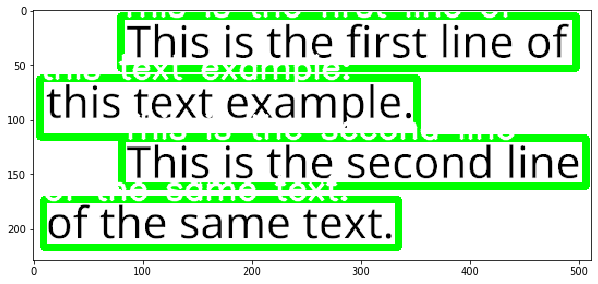

In [13]:
img = cv2.imread(image_path)
for detection in result:
    top_left = tuple([int(val) for val in detection [0][0]])
    bottom_right = tuple([int(val) for val in detection [0][2]])
    text = detection[1]
    font = cv2.FONT_HERSHEY_SIMPLEX
    img = cv2.rectangle(img, top_left, bottom_right, (0,255,0),5)
    img = cv2.putText(img, text, top_left, font, 1, (255,255,255),2, cv2.LINE_AA)
plt.figure(figsize = (10,10))
plt.imshow(img)
plt.show()